In [2]:
library(data.table)
# library(monocle, lib="~/alt_r_library/")
library(Seurat) #, lib="~/alt_r_library/")

In [3]:
figure_width  =  3
figure_height = 3
options(repr.plot.width = figure_width, repr.plot.height = figure_height)

In [4]:
wd = "/projects/PPC/pipeline/scRNA-Seq/Melton_ESC-B_GSE114412/dropbox/"

In [5]:
list.files(wd)

[1] "Misc.ES_iPS_comparison.cell_metadata.tsv"           
 [2] "Misc.ES_iPS_comparison.processed_counts.tsv.gz"     
 [3] "Misc.ES_iPS_comparison.raw_indrops_counts.tsv.gz"   
 [4] "Misc.GSE84133_HumanIslets.cell_metadata.tsv"        
 [5] "Misc.GSE84133_HumanIslets.processed_counts.tsv.gz"  
 [6] "Misc.GSE84133_HumanIslets.raw_indrops_counts.tsv.gz"
 [7] "Misc.Reagg_comparison.cell_metadata.tsv"            
 [8] "Misc.Reagg_comparison.processed_counts.tsv.gz"      
 [9] "Misc.Reagg_comparison.raw_indrops_counts.tsv.gz"    
[10] "Stage_5.all.cell_metadata.tsv"                      
[11] "Stage_5.all.processed_counts.tsv.gz"                
[12] "Stage_5.day0_prog_pseudotime.cell_metadata.tsv"     
[13] "Stage_5.day1_prog_pseudotime.cell_metadata.tsv"     
[14] "Stage_5.endocrine_pseudotime.cell_metadata.tsv"     
[15] "Stage_5.raw_indrops_counts.tsv.gz"                  
[16] "Stage_6.all.cell_metadata.tsv"                      
[17] "Stage_6.all.processed_counts.tsv.gz"                
[18] "Stage_6.exo.cell_metadata.tsv"                      
[19] "Stage_6.raw_indrops_counts.tsv.gz"                  
[20] "Stage_6.scbeta_pseudotime.cell_metadata.tsv"        
[21] "Stages_3_to_6.x1_S3c.cell_metadata.tsv"             
[22] "Stages_3_to_6.x1_S3c.processed_counts.tsv.gz"       
[23] "Stages_3_to_6.x1_S3c.raw_indrops_counts.tsv.gz"     
[24] "Stages_3_to_6.x1_S4c.cell_metadata.tsv"             
[25] "Stages_3_to_6.x1_S4c.processed_counts.tsv.gz"       
[26] "Stages_3_to_6.x1_S4c.raw_indrops_counts.tsv.gz"     
[27] "Stages_3_to_6.x1_S5c.cell_metadata.tsv"             
[28] "Stages_3_to_6.x1_S5c.processed_counts.tsv.gz"       
[29] "Stages_3_to_6.x1_S5c.raw_indrops_counts.tsv.gz"     
[30] "Stages_3_to_6.x1_S6c.cell_metadata.tsv"             
[31] "Stages_3_to_6.x1_S6c.processed_counts.tsv.gz"       
[32] "Stages_3_to_6.x1_S6c.raw_indrops_counts.tsv.gz"     
[33] "Stages_3_to_6.x2_S3c.cell_metadata.tsv"             
[34] "Stages_3_to_6.x2_S3c.processed_counts.tsv.gz"       
[35] "Stages_3_to_6.x2_S3c.raw_indrops_counts.tsv.gz"     
[36] "Stages_3_to_6.x2_S4c.cell_metadata.tsv"             
[37] "Stages_3_to_6.x2_S4c.processed_counts.tsv.gz"       
[38] "Stages_3_to_6.x2_S4c.raw_indrops_counts.tsv.gz"     
[39] "Stages_3_to_6.x2_S5c.cell_metadata.tsv"             
[40] "Stages_3_to_6.x2_S5c.processed_counts.tsv.gz"       
[41] "Stages_3_to_6.x2_S5c.raw_indrops_counts.tsv.gz"     
[42] "Stages_3_to_6.x2_S6c.cell_metadata.tsv"             
[43] "Stages_3_to_6.x2_S6c.processed_counts.tsv.gz"       
[44] "Stages_3_to_6.x2_S6c.raw_indrops_counts.tsv.gz"     
[45] "Veres2019_analysis_data.tar"

# Read data

In [ ]:
S3c.meta      = read.table("/projects/PPC/pipeline/scRNA-Seq/Melton_ESC-B_GSE114412/dropbox/Stages_3_to_6.x1_S3c.cell_metadata.tsv", sep = "\t", header = T)
S3c.processed = fread("zcat /projects/PPC/pipeline/scRNA-Seq/Melton_ESC-B_GSE114412/dropbox/Stages_3_to_6.x1_S3c.processed_counts.tsv.gz", sep = "\t")


In [69]:
S3c.2.meta      = read.table("/projects/PPC/pipeline/scRNA-Seq/Melton_ESC-B_GSE114412/dropbox/Stages_3_to_6.x2_S3c.cell_metadata.tsv", sep = "\t", header = T)
S3c.2.processed = fread("zcat /projects/PPC/pipeline/scRNA-Seq/Melton_ESC-B_GSE114412/dropbox/Stages_3_to_6.x2_S3c.processed_counts.tsv.gz", sep = "\t")

In [66]:
S4c.meta      = read.table("/projects/PPC/pipeline/scRNA-Seq/Melton_ESC-B_GSE114412/dropbox/Stages_3_to_6.x1_S4c.cell_metadata.tsv", sep = "\t", header = T)
S4c.processed = fread("zcat /projects/PPC/pipeline/scRNA-Seq/Melton_ESC-B_GSE114412/dropbox/Stages_3_to_6.x1_S4c.processed_counts.tsv.gz", sep = "\t")

In [70]:
S4c.2.meta      = read.table("/projects/PPC/pipeline/scRNA-Seq/Melton_ESC-B_GSE114412/dropbox/Stages_3_to_6.x2_S4c.cell_metadata.tsv", sep = "\t", header = T)
S4c.2.processed = fread("zcat /projects/PPC/pipeline/scRNA-Seq/Melton_ESC-B_GSE114412/dropbox/Stages_3_to_6.x2_S4c.processed_counts.tsv.gz", sep = "\t")

In [67]:
S5c.meta      = read.table("/projects/PPC/pipeline/scRNA-Seq/Melton_ESC-B_GSE114412/dropbox/Stages_3_to_6.x1_S5c.cell_metadata.tsv", sep = "\t", header = T)
S5c.processed = fread("zcat /projects/PPC/pipeline/scRNA-Seq/Melton_ESC-B_GSE114412/dropbox/Stages_3_to_6.x1_S5c.processed_counts.tsv.gz", sep = "\t")

In [71]:
S5c.2.meta      = read.table("/projects/PPC/pipeline/scRNA-Seq/Melton_ESC-B_GSE114412/dropbox/Stages_3_to_6.x2_S5c.cell_metadata.tsv", sep = "\t", header = T)
S5c.2.processed = fread("zcat /projects/PPC/pipeline/scRNA-Seq/Melton_ESC-B_GSE114412/dropbox/Stages_3_to_6.x2_S5c.processed_counts.tsv.gz", sep = "\t")

In [68]:
S6c.meta      = read.table("/projects/PPC/pipeline/scRNA-Seq/Melton_ESC-B_GSE114412/dropbox/Stages_3_to_6.x1_S6c.cell_metadata.tsv", sep = "\t", header = T)
S6c.processed = fread("zcat /projects/PPC/pipeline/scRNA-Seq/Melton_ESC-B_GSE114412/dropbox/Stages_3_to_6.x1_S6c.processed_counts.tsv.gz", sep = "\t")

In [72]:
S6c.2.meta      = read.table("/projects/PPC/pipeline/scRNA-Seq/Melton_ESC-B_GSE114412/dropbox/Stages_3_to_6.x2_S6c.cell_metadata.tsv", sep = "\t", header = T)
S6c.2.processed = fread("zcat /projects/PPC/pipeline/scRNA-Seq/Melton_ESC-B_GSE114412/dropbox/Stages_3_to_6.x2_S6c.processed_counts.tsv.gz", sep = "\t")

# Process data

In [4]:
GenerateNormalizedRobj <- function(processed, meta){
    
    S3c.processed = processed
    S3c.meta      = meta
    
    S3c.processed.t = t(S3c.processed)
    S3c.processed.t_colnames = S3c.processed.t
    colnames(S3c.processed.t_colnames) <- S3c.processed.t_colnames[1,]
    S3c.processed.t_colnames <- S3c.processed.t_colnames[2:nrow(S3c.processed.t_colnames),]
    rownames(S3c.meta) <- S3c.meta$library.barcode
    tiss <- CreateSeuratObject(counts = as.data.frame(S3c.processed.t_colnames), meta.data = S3c.meta)
    tiss <- FindVariableFeatures(tiss, selection.method = "vst", nfeatures = 2000)
    all.genes <- rownames(tiss)
    tiss <- ScaleData(tiss, features = all.genes)
    tiss <- RunPCA(tiss, npcs = 100, ndims.print = 1:2, nfeatures.print = 2)
    
    return(tiss)
    
}

In [5]:
ClusterRobj <- function(tiss, n.pcs, name){

    res.used <- .5

    tiss <- FindNeighbors(tiss, dims = 1:n.pcs)
    tiss <- FindClusters( tiss, resolution = res.used)
    tiss <- RunUMAP(tiss, dims = 1:n.pcs, min_dist = .8, seed = 10)

    figure_width  =  6
    figure_height = 5
    options(repr.plot.width = figure_width, repr.plot.height = figure_height)
    
    save(tiss, file=paste("./data/", name, ".Robj", sep = ""))

    print(DimPlot(tiss, reduction.use = "umap", group.by = "Assigned_cluster", pt.size = 1.2))
}

In [6]:
PlotTSNEfromMeta <- function(meta){
    
    figure_width  =  5
    figure_height = 5
    options(repr.plot.width = figure_width, repr.plot.height = figure_height)
    
    plot(meta[,"tSNE_dim1"], meta[,"tSNE_dim2"], pch = 16, col = as.factor(meta[,"Assigned_cluster"]), cex = 1.25,
        xlab = "TSNE1", ylab = "TSNE2")
    
    legend(min(meta[,"tSNE_dim1"]), max(meta[,"tSNE_dim2"]),
           legend = unique(meta[,"Assigned_cluster"]), col = unique(as.factor(meta[,"Assigned_cluster"])), pch = 16, cex = 1.25,
           bg = NA, bty = 'n', xjust = 0.15)
    
}

# Make Robjs for all ES-B data and visualize

## REP1

### Stages_3_to_6.x1_S3c

In [7]:
processed.data = S3c.processed
meta           = S3c.meta
name           = "Stages_3_to_6.x1_S3c"

In [8]:
S3c <- GenerateNormalizedRobj(processed.data, meta)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”Centering and scaling data matrix


PC_ 1 
Positive:  GCG, BTBD8 
Negative:  TUBB, RPS28 
PC_ 2 
Positive:  TOP2A, TPX2 
Negative:  ACTG1, FN1 


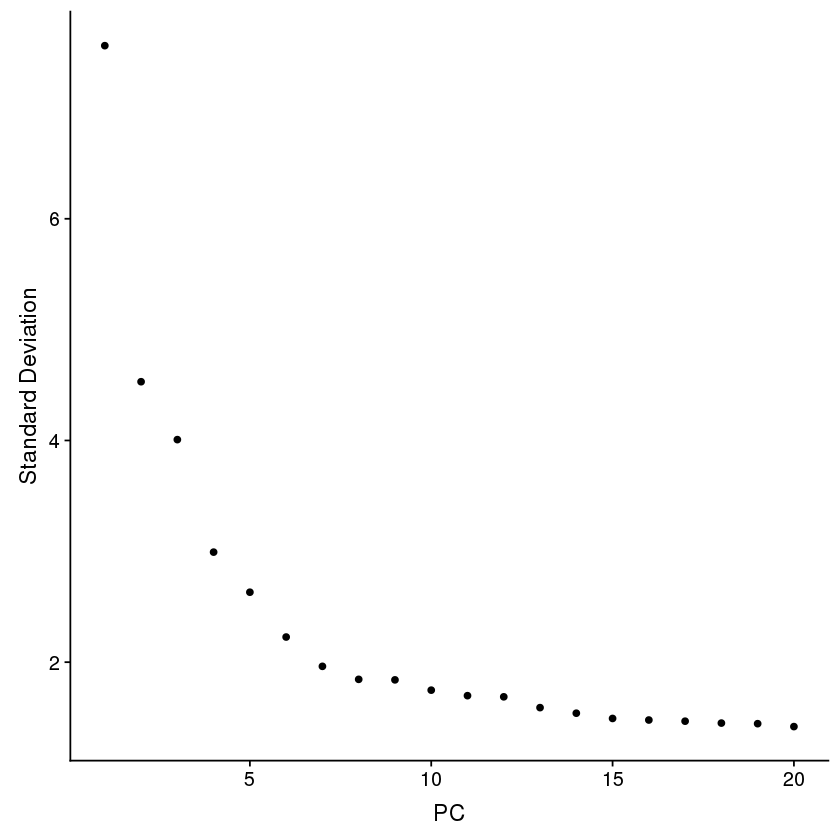

In [9]:
ElbowPlot(S3c, ndims = 20)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7982
Number of edges: 262219

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8355
Number of communities: 7
Elapsed time: 1 seconds


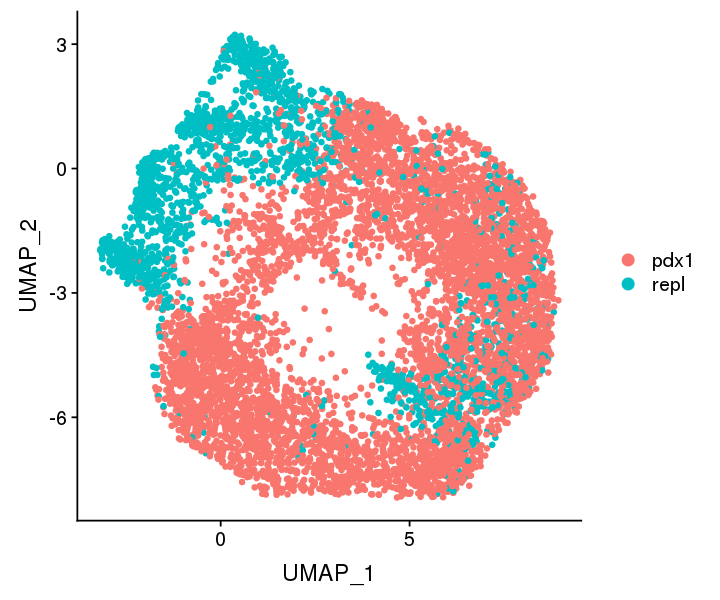

In [10]:
ClusterRobj(S3c, 12, name)

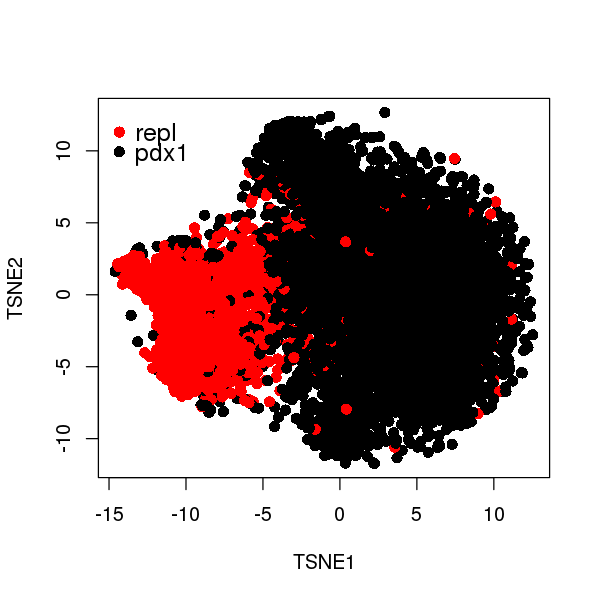

In [11]:
PlotTSNEfromMeta(meta)

### Stages_3_to_6.x1_S4c

In [74]:
processed.data = S4c.processed
meta           = S4c.meta
name           = "Stages_3_to_6.x1_S4c"

In [75]:
S4c <- GenerateNormalizedRobj(processed.data, meta)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”Centering and scaling data matrix


PC_ 1 
Positive:  STMN2, CPE 
Negative:  LDHB, DLK1 
PC_ 2 
Positive:  CMAHP, PTPN20 
Negative:  TUBB, POTEE 


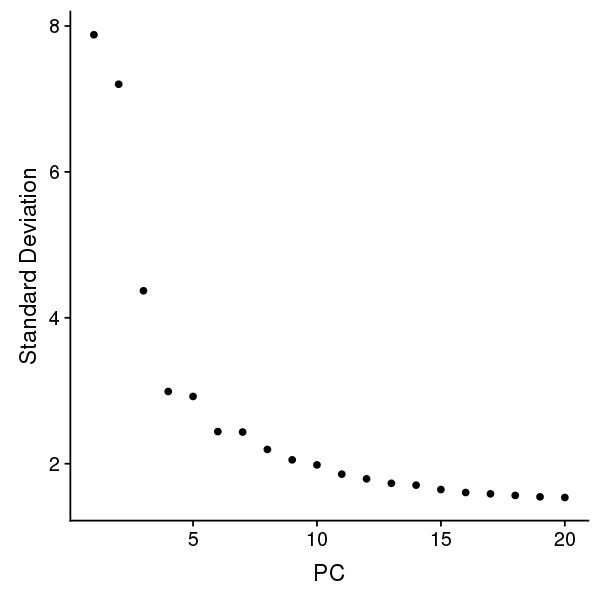

In [77]:
ElbowPlot(S4c, ndims = 20)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6960
Number of edges: 226127

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8548
Number of communities: 10
Elapsed time: 0 seconds


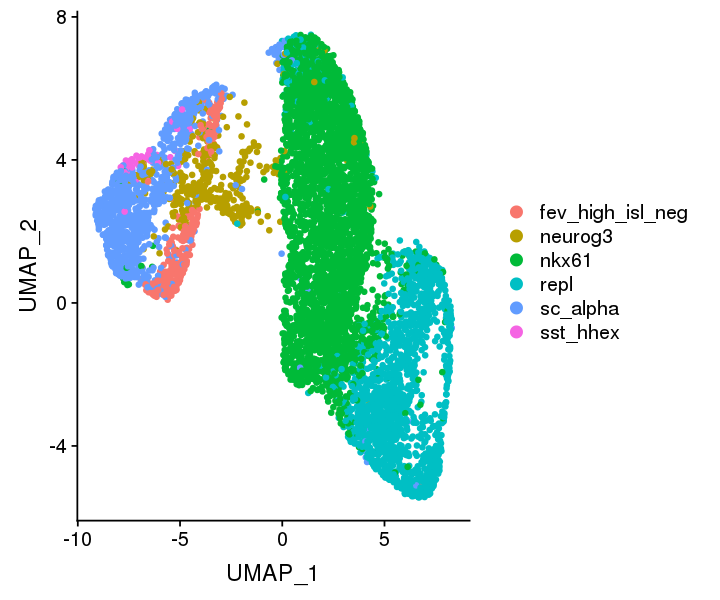

In [78]:
ClusterRobj(S4c, 12, name)

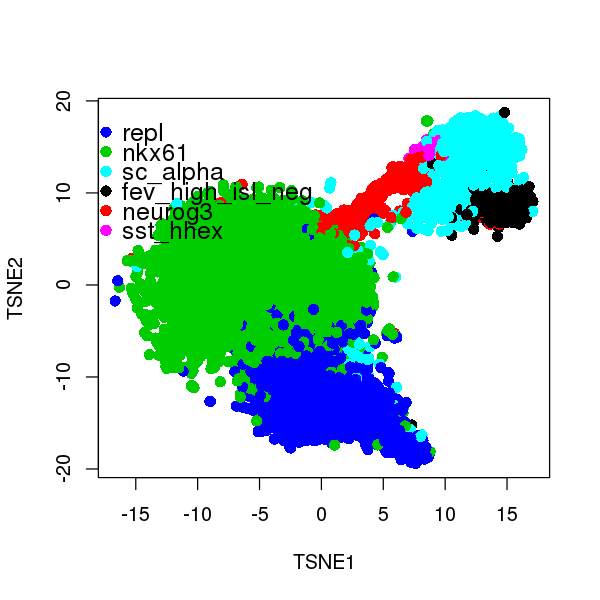

In [79]:
PlotTSNEfromMeta(meta)

### Stages_3_to_6.x1_S5c

In [80]:
processed.data = S5c.processed
meta           = S5c.meta
name           = "Stages_3_to_6.x1_S5c"

In [81]:
S5c <- GenerateNormalizedRobj(processed.data, meta)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”Centering and scaling data matrix


PC_ 1 
Positive:  PCSK1N, SCGN 
Negative:  ZFP36L1, LDHB 
PC_ 2 
Positive:  OTP, SST 
Negative:  TUBB, TUBA1B 


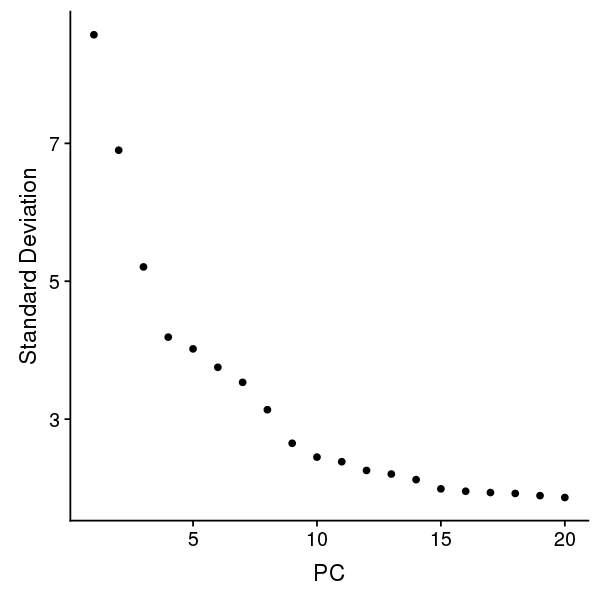

In [82]:
ElbowPlot(S5c, ndims = 20)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4193
Number of edges: 132502

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8895
Number of communities: 10
Elapsed time: 0 seconds


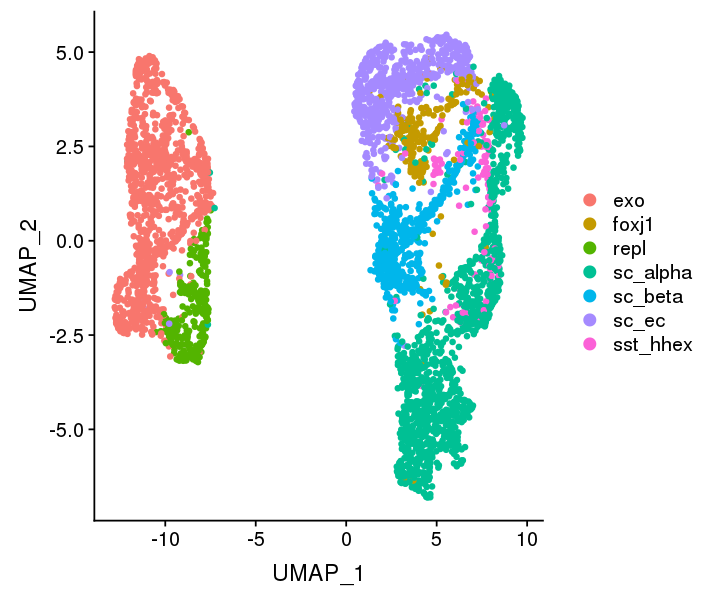

In [83]:
ClusterRobj(S5c, 14, name)

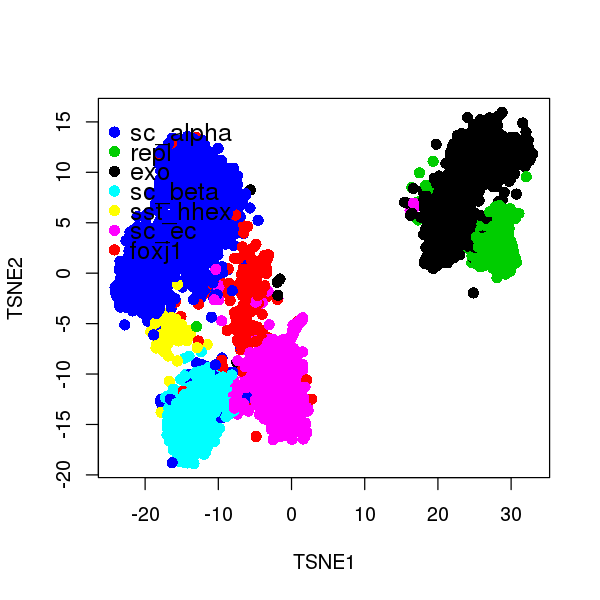

In [84]:
PlotTSNEfromMeta(meta)

### Stages_3_to_6.x1_S6c

In [85]:
processed.data = S6c.processed
meta           = S6c.meta
name           = "Stages_3_to_6.x1_S6c"

In [86]:
S6c <- GenerateNormalizedRobj(processed.data, meta)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”Centering and scaling data matrix


PC_ 1 
Positive:  PABPC1, LDHB 
Negative:  SCG5, CPE 
PC_ 2 
Positive:  QDPR, MAFB 
Negative:  TTYH1, SLC4A4 


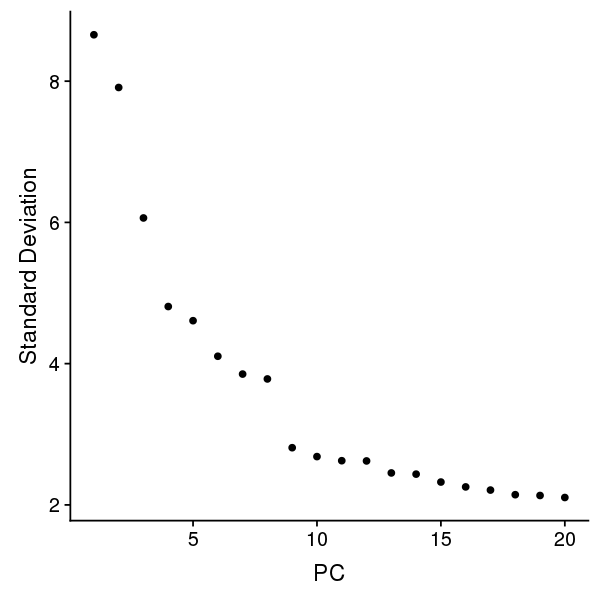

In [87]:
ElbowPlot(S6c, ndims = 20)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5186
Number of edges: 162928

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8970
Number of communities: 12
Elapsed time: 0 seconds


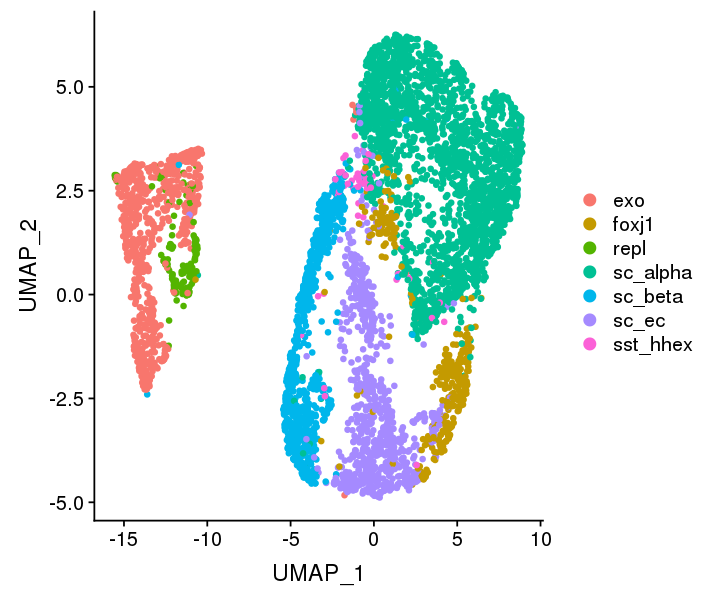

In [88]:
ClusterRobj(S6c, 12, name)

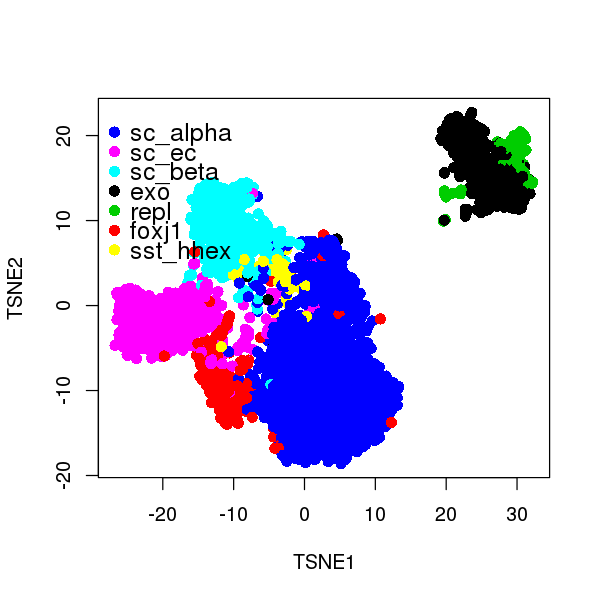

In [89]:
PlotTSNEfromMeta(meta)

## REP2

### Stages_3_to_6.x2_S3c

In [90]:
processed.data = S3c.2.processed
meta           = S3c.2.meta
name           = "Stages_3_to_6.x2_S3c"

In [91]:
S3c.2 <- GenerateNormalizedRobj(processed.data, meta)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”Centering and scaling data matrix


PC_ 1 
Positive:  CORIN, NEB 
Negative:  TUBB, ACTG1 
PC_ 2 
Positive:  PBX1, DNAJC15 
Negative:  TOP2A, HMGB2 


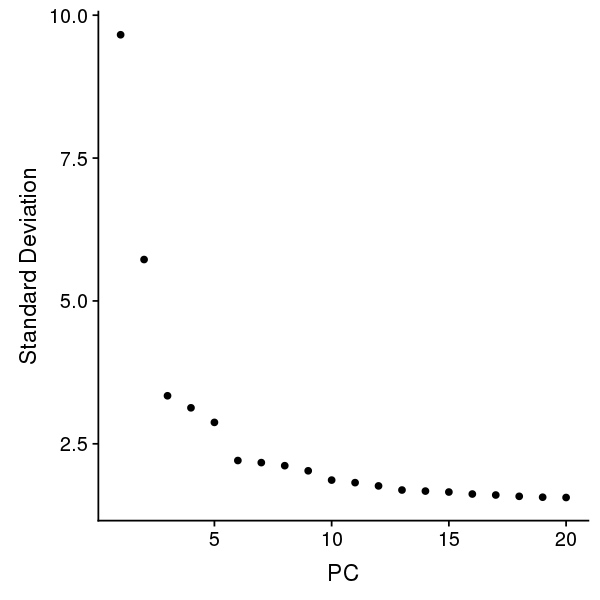

In [92]:
ElbowPlot(S3c.2, ndims = 20)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5457
Number of edges: 178246

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8191
Number of communities: 7
Elapsed time: 0 seconds


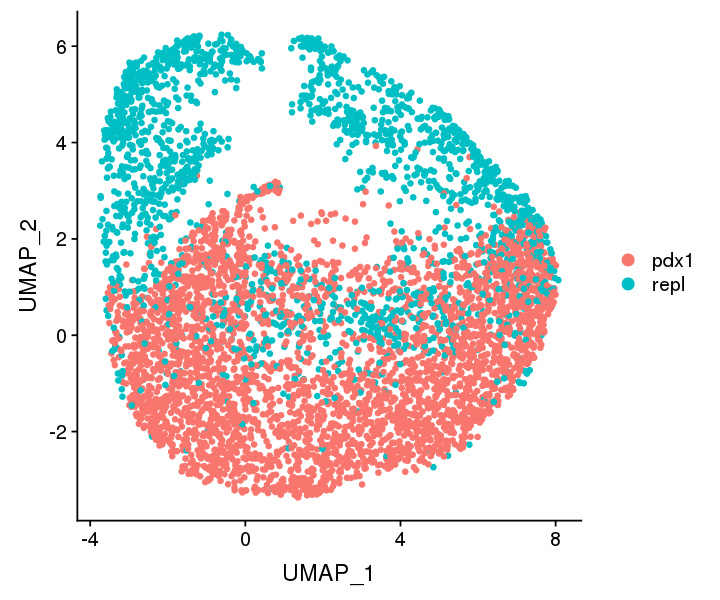

In [93]:
ClusterRobj(S3c.2, 10, name)

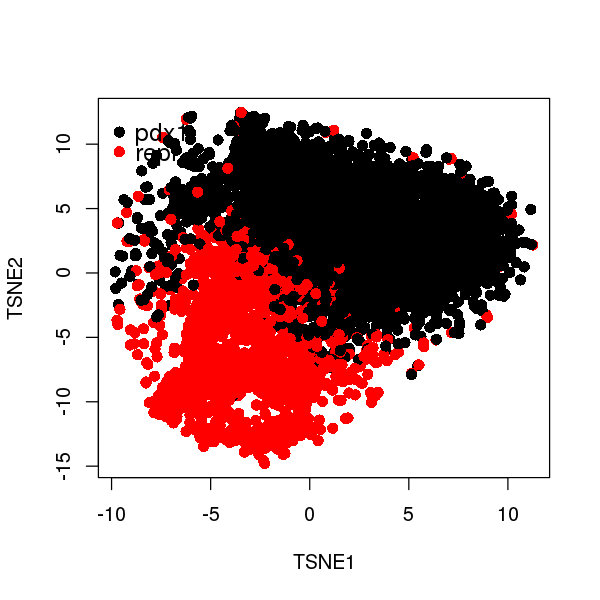

In [94]:
PlotTSNEfromMeta(meta)

### Stages_3_to_6.x2_S4c

In [95]:
processed.data = S4c.2.processed
meta           = S4c.2.meta
name           = "Stages_3_to_6.x2_S4c"

In [96]:
S4c.2 <- GenerateNormalizedRobj(processed.data, meta)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”Centering and scaling data matrix


PC_ 1 
Positive:  FN1, DLK1 
Negative:  PCSK1N, APLP1 
PC_ 2 
Positive:  SUSD2, PAX4 
Negative:  MALAT1, CDH1 


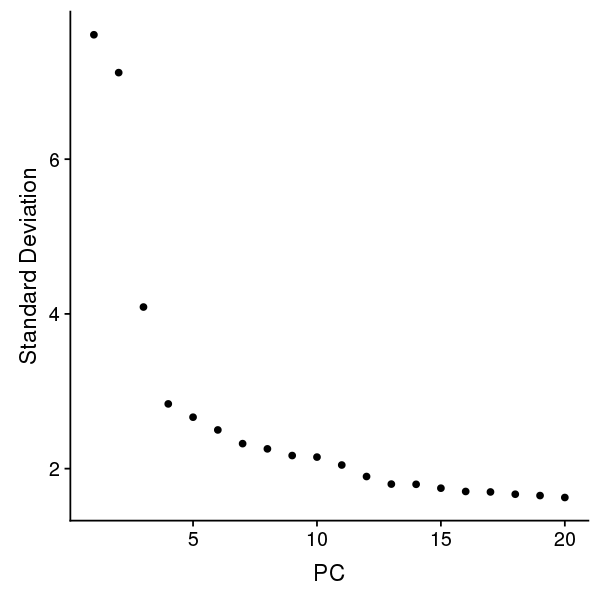

In [97]:
ElbowPlot(S4c.2, ndims = 20)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4986
Number of edges: 170696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8518
Number of communities: 9
Elapsed time: 0 seconds


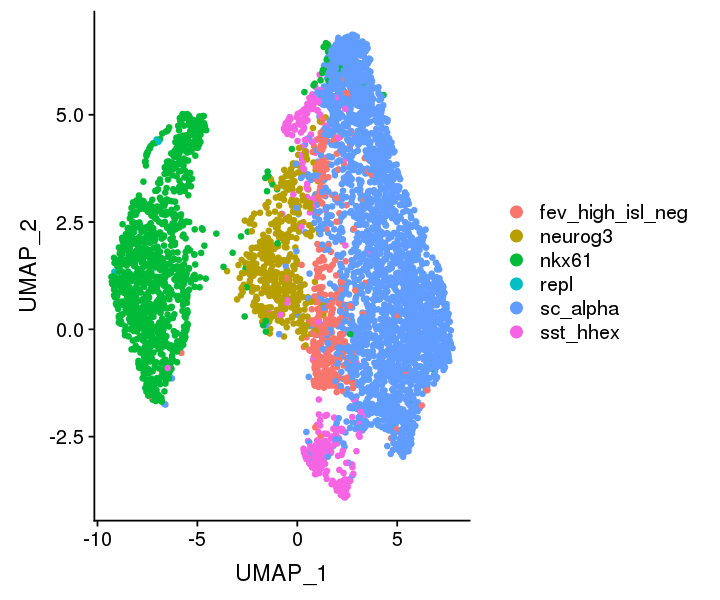

In [98]:
ClusterRobj(S4c.2, 14, name)

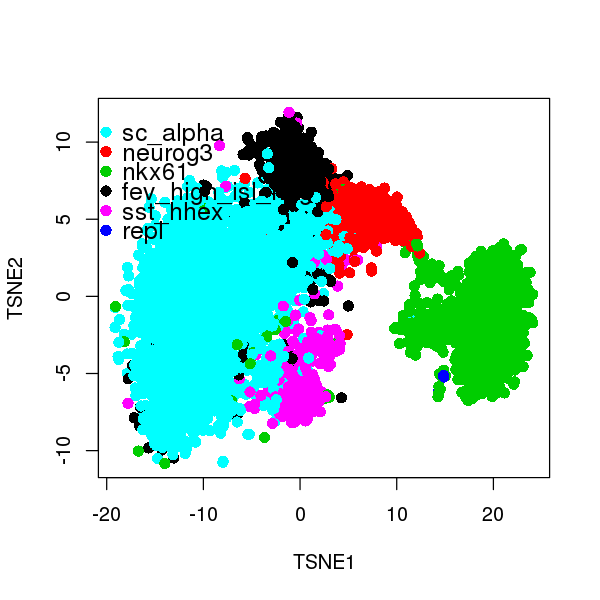

In [99]:
PlotTSNEfromMeta(meta)

### Stages_3_to_6.x2_S5c

In [100]:
processed.data = S5c.2.processed
meta           = S5c.2.meta
name           = "Stages_3_to_6.x2_S5c"

In [101]:
S5c.2 <- GenerateNormalizedRobj(processed.data, meta)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”Centering and scaling data matrix


PC_ 1 
Positive:  RPL10, RPL7 
Negative:  ESYT3, VGLL2 
PC_ 2 
Positive:  DLK1, ZFP36L1 
Negative:  CPE, TTR 


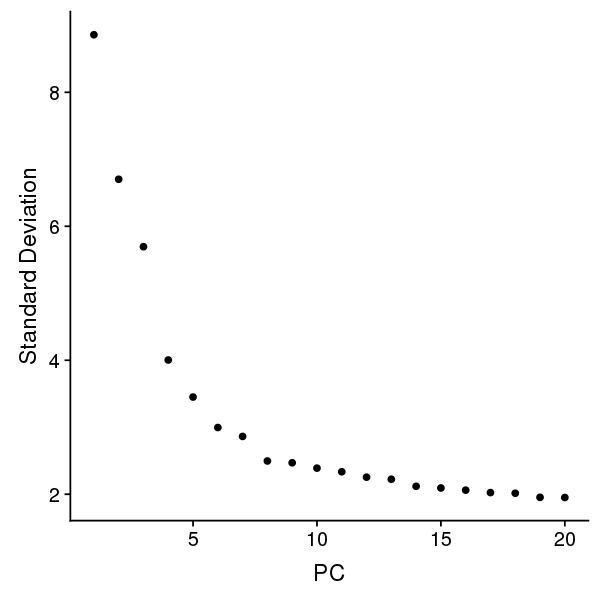

In [102]:
ElbowPlot(S5c.2, ndims = 20)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3174
Number of edges: 98566

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8569
Number of communities: 7
Elapsed time: 0 seconds


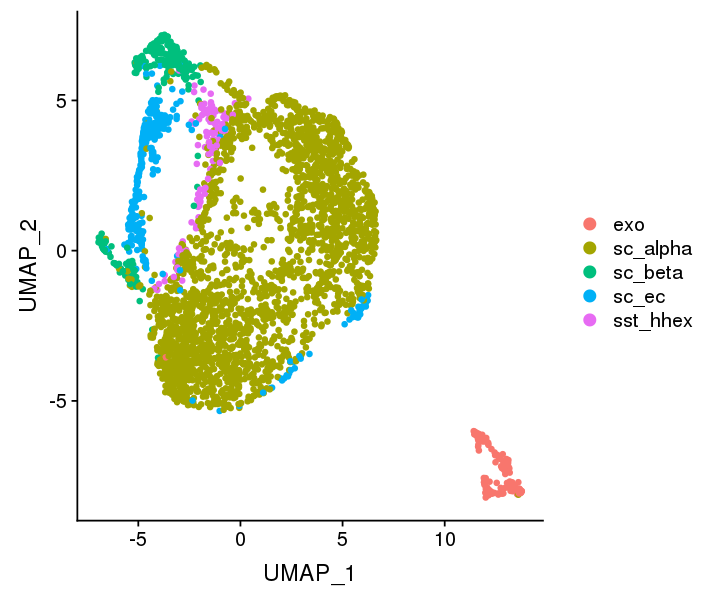

In [103]:
ClusterRobj(S5c.2, 8, name)

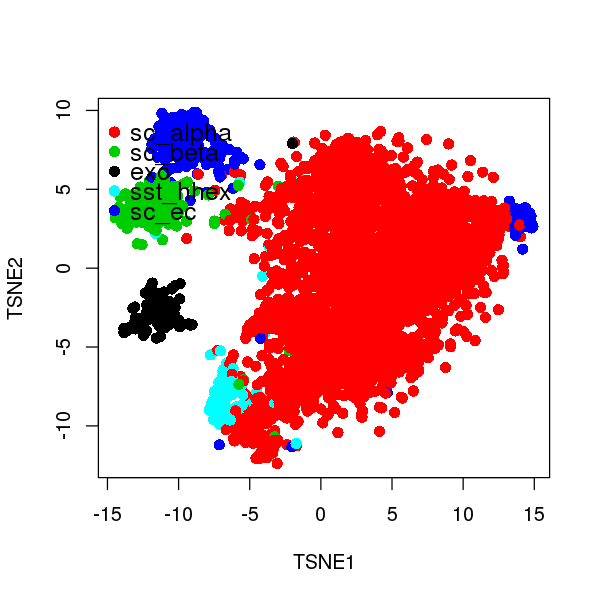

In [104]:
PlotTSNEfromMeta(meta)

### Stages_3_to_6.x2_S6c

In [105]:
processed.data = S6c.2.processed
meta           = S6c.2.meta
name           = "Stages_3_to_6.x2_S6c"

In [106]:
S6c.2 <- GenerateNormalizedRobj(processed.data, meta)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”Centering and scaling data matrix


PC_ 1 
Positive:  RPL7, RPS17 
Negative:  CRH, MMP9 
PC_ 2 
Positive:  DLK1, TTYH1 
Negative:  CHGA, MAFB 


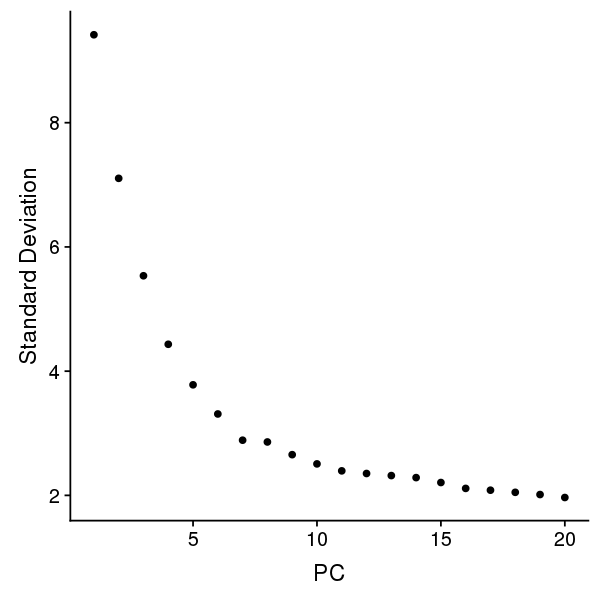

In [107]:
ElbowPlot(S6c.2, ndims = 20)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4152
Number of edges: 131166

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8492
Number of communities: 9
Elapsed time: 0 seconds


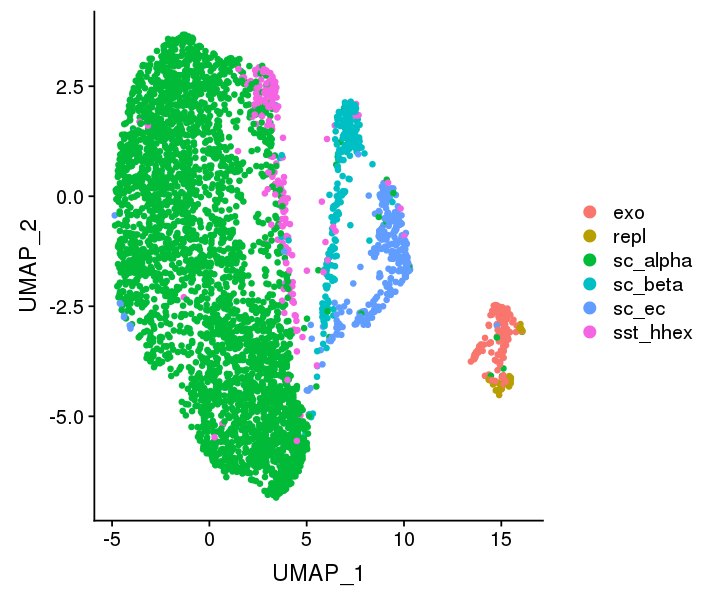

In [108]:
ClusterRobj(S6c.2, 10, name)

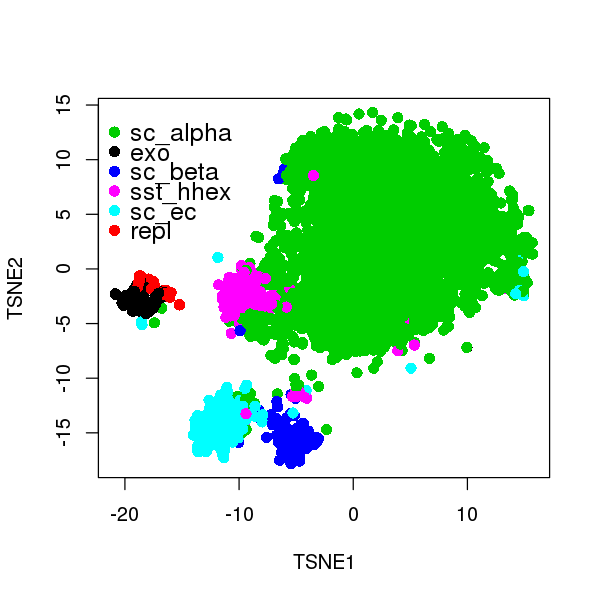

In [109]:
PlotTSNEfromMeta(meta)

# Integrate

In [7]:
load("/projects/PPC/analysis/ppc_pilot/data/melvin_data/Stages_3_to_6.x1_S3c.Robj")
S3c = tiss
load("/projects/PPC/analysis/ppc_pilot/data/melvin_data/Stages_3_to_6.x1_S4c.Robj")
S4c = tiss
load("/projects/PPC/analysis/ppc_pilot/data/melvin_data/Stages_3_to_6.x1_S5c.Robj")
S5c = tiss
load("/projects/PPC/analysis/ppc_pilot/data/melvin_data/Stages_3_to_6.x1_S6c.Robj")
S6c = tiss
load("/projects/PPC/analysis/ppc_pilot/data/melvin_data/ESB_only_integrated.Robj")
scb_integrated = integrated

S3c@meta.data$Celltype <- S3c@meta.data$Assigned_cluster
S4c@meta.data$Celltype <- S4c@meta.data$Assigned_cluster
S5c@meta.data$Celltype <- S5c@meta.data$Assigned_cluster
S6c@meta.data$Celltype <- S6c@meta.data$Assigned_cluster
S3c@meta.data$set    <- S3c@meta.data$Lib_prep_batch
S4c@meta.data$set    <- S4c@meta.data$Lib_prep_batch
S5c@meta.data$set    <- S5c@meta.data$Lib_prep_batch
S6c@meta.data$set    <- S6c@meta.data$Lib_prep_batch

In [12]:
load("/projects/PPC/analysis/ppc_pilot/data/robjs/PPC_fresh_merged_seurat_filtered_seurat_noendo_annotated_byPDX.robj", verbose = T)

In [13]:
tiss = tiss

In [15]:
tiss@meta.data$set <- "frazer"
data2integrate = list()
data2integrate[["tiss"]]   = tiss
data2integrate[["S3c"]]    = S3c
data2integrate[["S4c"]]    = S4c
data2integrate[["S5c"]]    = S5c
data2integrate[["S6c"]]    = S6c

In [ ]:
print("integrating data")
anchors    <- FindIntegrationAnchors(object.list = data2integrate, dims = 1:10)

[1] "integrating data"


Computing 2000 integration features
Scaling features for provided objects


In [ ]:
integrated <- IntegrateData(anchorset = anchors, dims = 1:10)
DefaultAssay(integrated) <- "integrated"
integrated <- ScaleData(integrated, verbose = FALSE)
integrated <- RunPCA(   integrated, npcs = 30, verbose = FALSE)
integrated <- RunUMAP(  integrated, reduction = "pca", dims = 1:10, seed = 10, min.dist = 0.1) #, n.neighbors = 30)

In [31]:
1+1

[1] 2

In [ ]:
print("saving integrated data")
save(integrated, file = paste("./robjs/", sample_name, "_seurat_SCBintegrated.robj",sep = ""))   

png(file = paste("./UMAP/", sample_name, "_SCBintegrated_byset_UMAP.png",sep = ""), width = 10, height = 5, units = "in", res = 300)
DimPlot(integrated, group.by = "set", label = T, pt.size = .15,
        vector.friendly = T, png.file = paste("./UMAP/", sample_name, "_SCBintegrated_byset_UMAP.png",sep = ""),
        png.arguments = c(10, 5, 300), do.return=TRUE)
dev.off()

png(file = paste("./UMAP/", sample_name, "_SCBintegrated_bycelltype_UMAP.png",sep = ""), width = 10, height = 5, units = "in", res = 300)
DimPlot(integrated, group.by = "Celltype", label = T, pt.size = .15,
        vector.friendly = T, png.file = paste("./UMAP/", sample_name, "_SCBintegrated_bycelltype_UMAP.png",sep = ""),
        png.arguments = c(10, 5, 300), do.return=TRUE)
dev.off()